# Notebook that Simulates Kalman Filter Algorithm

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

/home/professor/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Kalman Implementation

In [2]:
def kalman_filter(initial_guess,guess_variance, measurements,measurement_variances, process_noise=0.0, plot = False, true_value = None,precision = 0.1):
    #initial estimations
    state_etimation = initial_guess;
    estimation_variance = guess_variance;
    N = len(measurement_variances)
    #prediction
    predicted_estimation = state_etimation;
    predicted_estimation_variance = guess_variance+process_noise;

    estimates = np.zeros(N+1)
    estimates[0] = state_etimation;
    Kalman_gains = np.zeros(N)
    if plot:
        plt.scatter(0,state_etimation,color = 'red',label = "initial_state");
    
    #iterating in for all given measurements
    for i in range(N):
        #Calculate the Kalman Gian
        Kalman_Gian = predicted_estimation_variance/(predicted_estimation_variance+measurement_variances[i])
        Kalman_gains[i] = Kalman_Gian
        #Compute the current State Estimate
        state_etimation = predicted_estimation + Kalman_Gian*(measurements[i]-predicted_estimation)
        estimates[i+1] = state_etimation
        estimation_variance = (1-Kalman_Gian)*predicted_estimation_variance

        #Compute the prediction using dynamic Model
        predicted_estimation = state_etimation;
        predicted_estimation_variance = estimation_variance+process_noise;
    if plot:
        iterations = np.arange(0,N+1)
        plt.plot(iterations[1:],estimates[1:],marker='s',markersize=5,label = "estimates")
        plt.plot(iterations[1:],measurements,marker = 10, label = "measurements")
        if true_value is not None:
            t_vals = np.ones(N+1)*true_value
            plt.plot(iterations[1:], t_vals[1:],marker=4,label = "true values")
        plt.xlabel ("Iterations")
        plt.title("Kalman Filter Simulations")
        plt.legend()
        plt.show()
        plt.figure();
        plt.plot(Kalman_gains,marker="o",markersize = 5)
        plt.title("Kalman Gains")
        plt.xlabel("Iterations")
    return estimates
    

## Kalman Filter with ADC Values

In [3]:
true_ADC_Code = 2482
measured_codes = np.array([2392,2393,2383,2386,2387,2383,2367,2384,2384,2383,2394,2282,2395,2395,2387,2384,2393,2389,2390,2378,2382,2384,2385
])
offset = -159
slope = 1326

voltages = (measured_codes-offset)/slope
voltages

array([1.92383107, 1.92458522, 1.91704374, 1.91930618, 1.92006033,
       1.91704374, 1.90497738, 1.91779789, 1.91779789, 1.91704374,
       1.92533937, 1.84087481, 1.92609351, 1.92609351, 1.92006033,
       1.91779789, 1.92458522, 1.92156863, 1.92232278, 1.913273  ,
       1.91628959, 1.91779789, 1.91855204])

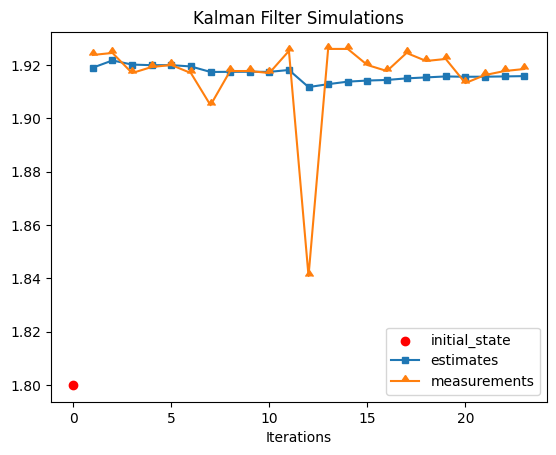

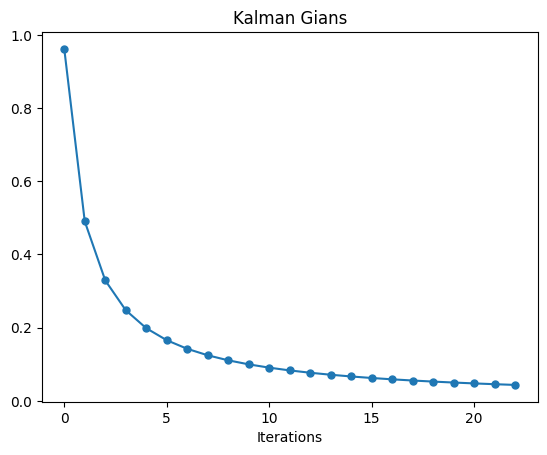

In [12]:
variances = 0.01*np.ones(len(voltages))
initial_guess = 1.8
inital_var = 0.25
estimates = kalman_filter(initial_guess,inital_var,voltages,variances,plot=True)

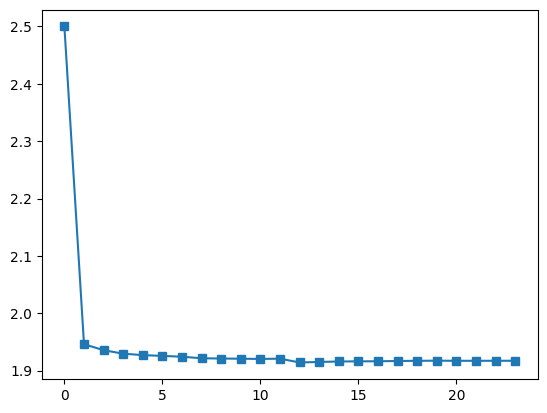

In [7]:
trues = 2*np.ones(len(estimates))
errors = trues - estimates
plt.plot(estimates, marker="s", label = "estimates")


## Simulation with the Scale Voltage

In [8]:
dataset = [[1.644733,1.386407],
[1.7700000,1.330951],
[1.917758,1.353521],
[1.876640,1.372896],
[1.978614,1.394528],
[1.858548,1.410529],
[1.658713,1.418802],
[1.387332,1.417787],
[1.603615,1.423594],
[1.618417,1.429497],
[1.773022,1.439601],
[1.2300000,1.398470],
[2.464632,1.428085],
[1.788647,1.437830],
[2.051804,1.453987],
[1.118418,1.445383],
[1.699009,1.451724],
[1.563319,1.454446],
[2.962986,1.490363],
[1.185030,1.483262],
[1.986837,1.494707],
[1.451477,1.493747],
[1.537825,1.494705],
[1.773844,1.500644],
[1.697364,1.504742],
[1.568253,1.506038],
[1.681739,1.509552],
[1.593746,1.511203],
[1.565786,1.512253],
[1.660358,1.515047],
[1.706410,1.518591],
[1.592101,1.519928],
[1.533713,1.520174],
[1.586345,1.521335],
[1.060030,1.513381],
[1.771377,1.517754],
[1.768088,1.521926],
[1.34300000,1.496977],
[1.605259,1.498723],
[1.516444,1.499004],
[1.540292,1.499650],
[2.541112,1.515672],
[1.303451,1.512457],
[1.581411,1.513486],
[1.311674,1.510518],
[1.536180,1.510890],
[1.588812,1.512003],
[1.632397,1.513699],
[1.559207,1.514331],
[1.636509,1.516005],
[1.557562,1.516566],
[1.526312,1.516696],
[1.657068,1.518543],
[1.634864,1.520054],
[1.527957,1.520155],
[1.526312,1.520233],
[1.550983,1.520617],
[1.947364,1.525886],
[1.945719,1.531006],
[1.617595,1.532049],
[1.779601,1.534996],
[1.735193,1.537351],
[1.527957,1.537242],
[1.789469,1.540141],
[1.415293,1.538723],
[1.623351,1.539674],
[1.671049,1.541133],
[1.839634,1.544414],
[1.4500000,1.527627],
[1.426806,1.526542],
[1.535358,1.526636],
[1.785357,1.529360],
[2.029600,1.534570],
[1.789000,1.518750],
[1.341280,1.516939],
[1.802627,1.519825],
[2.592099,1.530548],
[1.550161,1.530742],
[1.777134,1.533158],
[1.619239,1.533993],
[12.351968,1.541859],
[1.828121,1.544585],
[1.529604,1.535010],
[1.784535,1.537342],
[2.652954,1.547671],
[2.421047,1.555684],
[1.450000,1.541541],
[1.3440000,1.527654],
[1.440000,1.5141]]

In [9]:
volts = []
filtered = []
for i in range(len(dataset)):
    volts.append(dataset[i][0])
    filtered.append(dataset[i][1])
print(len(volts))

89


In [10]:
volts = np.array(volts)
volts[volts==12.351968] = 2.351968

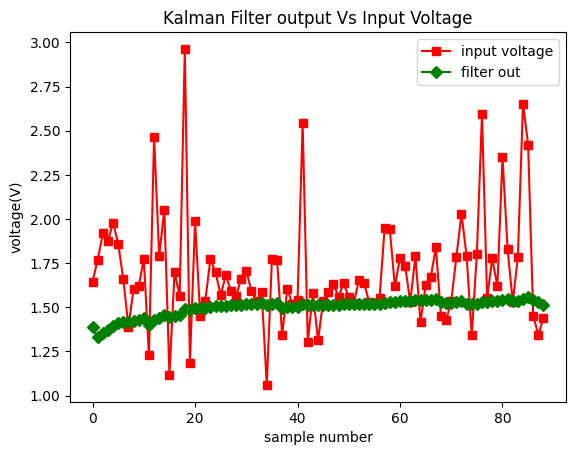

In [11]:
plt.plot(volts,color = "r", label = "input voltage",marker = "s");
plt.plot(filtered, color = "g", label = "filter out",marker = "D");
plt.xlabel ("sample number")
plt.ylabel("voltage(V)")
plt.title("Kalman Filter output Vs Input Voltage")
plt.legend()